<a name="top"></a>
<br/>
# Using `medGAN` on the MIMIC-III dataset of shape (1000, 100) with binary values

Author: [Sylvain Combettes](https://github.com/sylvaincom). <br/>
Last update: Sep 11, 2019. Creation: Aug 12, 2019. <br/>
My own `medGAN` repository: [medgan-tips](https://github.com/sylvaincom/medgan-tips) (based on Edward Choi's work). <br/>
Edward Choi's original repository: [medgan](https://github.com/mp2893/medgan).

Before reading this notebook, make sure that you have read my [medGAN repository](https://github.com/sylvaincom/medgan-tips)'s table of contents.

---
### Table of Contents

- [1) Using `process_mimic.py` and `medgan.py` to generate the fake realistic data](#run)
- [2) Processing `gen-samples.npy`](#gen-samples)
- [3) Comparing the fictitious generated samples to the real-life original ones](#comparison)

---
### Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import pickle

---
<a name="run"></a>
# 1) Using `process_mimic.py` and `medgan.py` to generate the fake realistic data 

This step is detailed in my tutorial [A few additional tips on how to run Edward Choi's medGAN
](https://github.com/sylvaincom/medgan/blob/master/tips-for-medgan.md).

In short, in the Anaconda prompt, we run:
```
cd C:\Users\<username>\Documents\mimic_binary_small_rd
python process_mimic.py ADMISSIONS.csv DIAGNOSES_ICD.csv training-data "binary"
mkdir generated
```

`process_mimic.py` outputs `training-data.matrix` that contains 46 520 samples and 1 071 features. We should not perform data augmentation on a dataset that already has a lot of samples because we have no shortage of samples. We are going to randomly select 1 000 samples and randomly select 100 features from the MIMIC-III dataset. We use a random seed for reproducibility. This is our `df_real_small` dataset. Thus, we are in a situation where we have a shortage of samples so we will try to perform data augmentation (in another notebook following this one).

In [13]:
real_data = pickle.load(open('mimic_binary.matrix', 'rb')) # real-life dataset
df_real = pd.DataFrame(real_data)
print(df_real.shape)

(100, 295)


We randomly select the 1000 samples:

In [14]:
df_real_small = df_real.sample(100, random_state=1)
print(df_real_small.shape)

(100, 295)


We randomly select 100 features:

In [5]:
df_real_small = df_real_small.sample(100, axis=1, random_state=1)
print(df_real_small.shape)

(100, 100)


We can now export our dataset:

In [6]:
matrix = pd.DataFrame.as_matrix(df_real_small)
pickle.dump(matrix, open('training-data-small.matrix', 'wb'), -1)

C:\Anaconda\envs\MedGAN1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


We check if it was saved correctly:

In [7]:
real_data_array_small = pickle.load(open('training-data-small.matrix', 'rb'))
df_real_small = pd.DataFrame(real_data_array_small)
print(df_real_small.shape)
df_real_small.head(5)

(100, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, in the Anaconda prompt, we run:
```
python medgan.py training-data-small.matrix ./generated/samples --data_type="binary" --n_epoch=1000 --n_pretrain_epoch=100 --batch_size=100
python medgan.py training-data-small.matrix gen-samples --model_file=./generated/samples-999 --generate_data=True --data_type="binary"
```
Some default values are `n_epoch=1000`, `n_pretrain_epoch=100` and `batch_size=1000`. We choose `nSamples=1000` line 406 in `medgan.py`.

---
<a name="gen-samples"></a>
# 2) Processing `gen-samples.npy`

We load the `gen-samples.npy` file which is `medgan.py`'s output:

In [15]:
fict = np.load('gen-samples.npy') # fictitious generated dataset
df_fict = pd.DataFrame(fict)
print(df_fict.shape)
df_fict.head()

(10000, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000002,0.000014,7.916892e-07,0.000098,0.000002,0.000023,0.000055,0.000003,0.000015,0.000017,...,3.200248e-06,0.799545,0.000040,0.001382,1.019281e-04,0.001072,0.000004,7.103156e-06,9.771470e-07,0.000040
1,0.000258,0.000059,2.130765e-05,0.000021,0.000100,0.000038,0.000002,0.000177,0.000142,0.000034,...,1.647139e-07,0.927562,0.000320,0.000028,9.014159e-07,0.000004,0.000037,2.131552e-04,2.970848e-05,0.000836
2,0.003131,0.000180,1.210309e-04,0.000184,0.000070,0.000022,0.000005,0.000065,0.000103,0.000097,...,5.175473e-06,0.998804,0.000625,0.000019,6.875411e-06,0.000005,0.000040,1.670156e-04,4.382241e-04,0.000074
3,0.000462,0.000002,1.537332e-05,0.000019,0.000001,0.000006,0.000001,0.000005,0.000016,0.000005,...,3.359231e-05,0.020622,0.000007,0.000167,7.649106e-03,0.000001,0.000002,9.474636e-07,5.292780e-05,0.000010
4,0.000297,0.000145,8.449186e-05,0.000196,0.000156,0.000245,0.000007,0.000332,0.000112,0.000144,...,5.892191e-05,0.029792,0.000289,0.000895,3.719879e-03,0.000001,0.000104,1.942896e-05,4.237965e-05,0.000904


The ouput of `medgan.py` has no missing values.

We need to round the values ourselves:

In [16]:
df_fict = df_fict.round(0)
df_fict.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
<a name="comparison"></a>
# 3) Comparing the fictitious generated samples to the real-life original ones

Here is a recap of our parameters for `medGAN`:

| dataset | number of samples | number of features |
|---|---|---|
|`df_real_small` | 1 000 | 111 |
|`df_fict` | 1 000 | 100 |

| `n_epoch` | `n_pretrain_epoch` | `batch_size` | `nSamples` |
|---|---|---|---|
| 1 000 | 100 | 100 | 1 000 |

## 3.1) Probability distribution of the real-life data

100 295


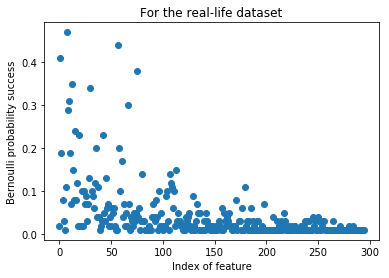

In [17]:
df_real = df_real_small
n_real, p_real = df_real.shape
print(n_real, p_real)

proba_real = [sum(df_real[f])/n_real for f in list(df_real)]

plt.plot(proba_real, 'o')
plt.xlabel('Index of feature')
plt.ylabel('Bernoulli probability success')
plt.title('For the real-life dataset')
plt.show()

## 3.2) Probability distribution of the fictitious generated data

10000 100


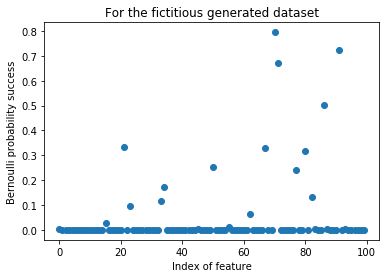

In [18]:
n_fict, p_fict = df_fict.shape
print(n_fict, p_fict)

proba_fict = [sum(df_fict[f])/n_fict for f in list(df_fict)]

plt.plot(proba_fict, 'o')
plt.xlabel('Index of feature')
plt.ylabel('Bernoulli probability success')
plt.title('For the fictitious generated dataset')
plt.show()

In [20]:
n_real, p_real = df_real.shape
proba_real = [sum(df_real[f]) / n_real for f in list(df_real)]


## 3.3) Comparison: dimension-wise probability

ValueError: x and y must have same first dimension, but have shapes (295,) and (100,)

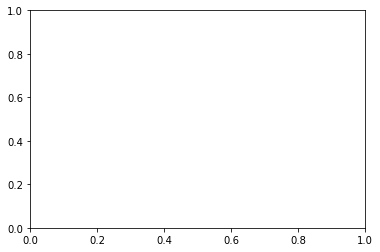

In [21]:
xaxis = proba_real
yaxis = proba_fict

start = min(np.min(xaxis), np.min(yaxis))
stop = max(np.max(xaxis), np.max(yaxis))
p = len(xaxis)
X = np.linspace(start, stop, num=p+1)

plt.plot(xaxis, yaxis, 'ok', X, X, '-g');

plt.legend(['Bernoulli success probability', 'ideal Bernoulli success probability'])
plt.title('Dimension-wise probability performance of medGAN')
plt.xlabel('For the real-life dataset')
plt.ylabel('For the fictitious generated dataset')
plt.savefig('accuracy_mimic_binary_small.png', dpi=120) # to save the image in high resolution
plt.show()

---
Back to [top](#top).